In [ ]:
from keras.datasets import mnist
from sklearn.tree import DecisionTreeClassifier, export_text

from sklearn.metrics import accuracy_score
from sklearn import tree
            
import numpy as np
import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB
import pickle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB


## load File

In [ ]:
# Load MNIST dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
(train_X_Or, train_y_Or), (test_X_Or, test_y_Or) = (train_X, train_y), (test_X, test_y)

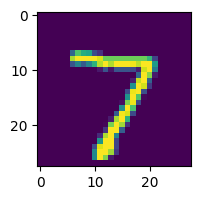

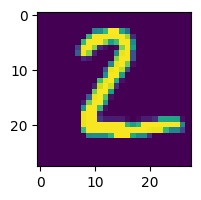

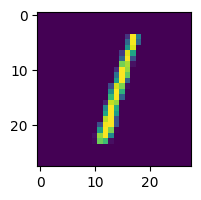

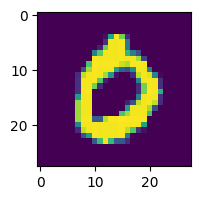

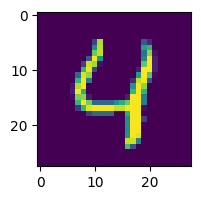

In [ ]:
# Set default figure size to 6 inches (width) by 4 inches (height)
plt.rcParams["figure.figsize"] = (4, 2)

for i in range(5):
    plt.imshow(test_X_Or[i])
    plt.show()
## Answer: 9 2 1 0 9

## Describe 

In [ ]:
train_X.shape, train_y.shape, test_X.shape, test_y.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
train_y

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

## Reshape input data

In [ ]:

train_X = train_X.reshape(train_X.shape[0], -1)         # matrix 2 chiều -> vector 1 chiều. 
test_X = test_X.reshape(test_X.shape[0], -1)

In [ ]:
train_X.shape, test_X.shape


((60000, 784), (10000, 784))

In [ ]:
test_X.shape , test_y.shape

((10000, 784), (10000,))

In [ ]:
train_X[:5]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

# 1. Decision Tree

### 1.1 DecisionTreeClassifier

In [ ]:
# Create Decision Tree model
dtree_Class = DecisionTreeClassifier(random_state=42)

# Fit training data to the model
dtree_Class.fit(train_X, train_y)

train_preds = dtree_Class.predict(train_X)
test_preds = dtree_Class.predict(test_X)

In [ ]:
# Compute accuracy on training set

train_acc_treeCLass = accuracy_score(train_y, train_preds)
print("Training accuracy:", train_acc_treeCLass)

# Compute accuracy on test set

test_acc_treeCLass = accuracy_score(test_y, test_preds)
print("Test accuracy:", test_acc_treeCLass)

Training accuracy: 1.0
Test accuracy: 0.8755


### 1.2 DecisionTreeRegressor

In [ ]:
tree_Reg = tree.DecisionTreeRegressor()
tree_Reg.fit(train_X, train_y)

train_preds = tree_Reg.predict(train_X)
test_preds = tree_Reg.predict(test_X)

train_acc_treeReg = accuracy_score(train_y, train_preds)
print("Training accuracy:", train_acc_treeReg)

# Compute accuracy on test set

test_acc_treeReg = accuracy_score(test_y, test_preds)
print("Test accuracy:", train_acc_treeReg)

Training accuracy: 1.0
Test accuracy: 1.0


In [ ]:
# Save model to file
with open("decision_tree.txt", "w") as f:
    f.write(export_text(dtree_Class, feature_names=["pixel"+ str(i) for i in range(784)]))

In [ ]:
def saveModel(pathFile, model):
    with open(pathFile, "w") as f:
        f.write(export_text(model, feature_names=["pixel"+ str(i) for i in range(784)]))
        


In [ ]:
## Classifier
with open("decision_tree.txt", "r") as f:
    tree_data = f.read()
    dtree_loaded = DecisionTreeClassifier(random_state=42)
    dtree_loaded = dtree_loaded.fit(train_X.reshape((train_X.shape[0], -1)), train_y)
    dtree_loaded_str = export_text(dtree_loaded, feature_names=["pixel{}".format(i) for i in range(784)])
    dtree_loaded_str = dtree_loaded_str.replace('\n', '')

# Create new decision tree from loaded model
dtree_new = DecisionTreeClassifier(random_state=42)
dtree_new.fit(train_X.reshape((train_X.shape[0], -1)), train_y)

# Make predictions on new data
new_data = np.array([test_X[0], test_X[1], test_X[2], test_X[3], test_X[4]])
new_preds = dtree_new.predict(new_data.reshape((new_data.shape[0], -1)))
print("Predictions for new data:", new_preds)

Predictions for new data: [7 2 1 0 4]


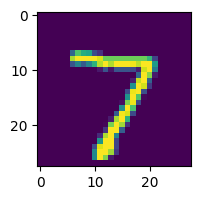

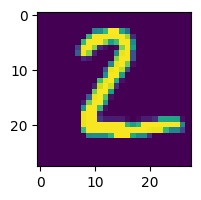

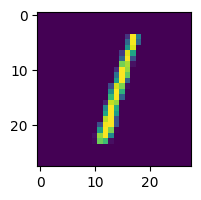

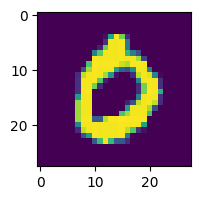

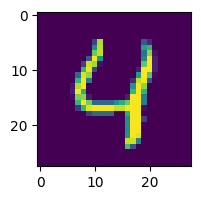

In [ ]:

# Set default figure size to 6 inches (width) by 4 inches (height)
plt.rcParams["figure.figsize"] = (4, 2)

for i in range(5):
    plt.imshow(test_X_Or[i])
    plt.show()


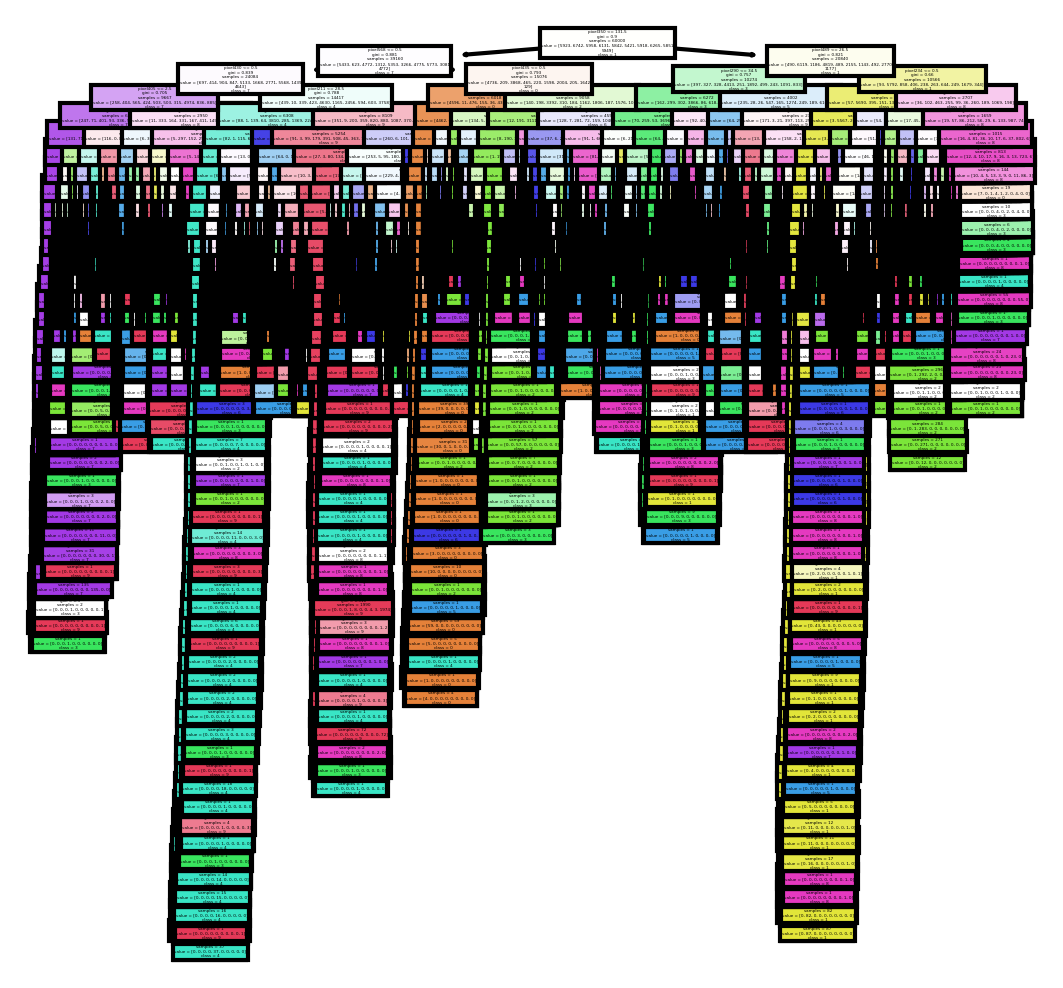

In [ ]:
# Plot decision tree
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4,4), dpi=300)
tree.plot_tree(dtree_Class, feature_names=["pixel"+ str(i) for i in range(784)], class_names=[str(i) for i in range(10)], filled=True)

plt.show()

# 2. Navie Bayes classifier
### 2.1 GaussianNB


In [ ]:
##
navi_GB = GaussianNB()
navi_GB.fit(train_X, train_y)

train_preds_NB = navi_GB.predict(train_X)
test_preds_NB = navi_GB.predict(test_X)


In [ ]:
# Compute accuracy on training set
train_acc_Gau = accuracy_score(train_y, train_preds_NB)
print("Training accuracy:", train_acc_Gau)

# Compute accuracy on test set
test_acc_Gau = accuracy_score(test_y, test_preds_NB)
print("Test accuracy:", test_acc_Gau)

Training accuracy: 0.5649
Test accuracy: 0.5558


### 2.2 BernoulliNB

In [ ]:
clf = BernoulliNB(force_alpha=True)
clf.fit(train_X, train_y)

# Make predictions
train_preds_NB = clf.predict(train_X)
test_preds_NB = clf.predict(test_X)

# Compute accuracy on training set
train_acc_Ber = accuracy_score(train_y, train_preds_NB)
print("Training accuracy:", train_acc_Ber)

# Compute accuracy on test set
test_acc_Ber = accuracy_score(test_y, test_preds_NB)
print("Test accuracy:", test_acc_Ber)

Training accuracy: 0.83125
Test accuracy: 0.8413


### Using GaussianNB to Load / Save file
#### Compare to Image, because accuracy -Training accuracy: 0.5649, Test accuracy: 0.5558

In [ ]:
## Just use GaussianNB to save and load file
# Save the pre-trained model to file
with open("naive_bayes_model.pkl", "wb") as f:
    pickle.dump(navi_GB, f)

# Load the model from a file
with open("naive_bayes_model.pkl", "rb") as f:
    nb_loaded = pickle.load(f)


# Run inference (prediction) for at least 5 input samples
samples = test_X[:5]
predictions = nb_loaded.predict(samples)
print("Predictions:", predictions)

Predictions: [9 2 1 0 9]


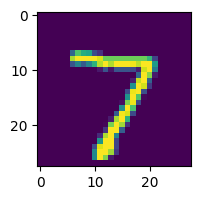

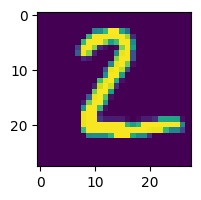

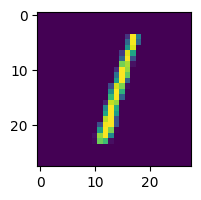

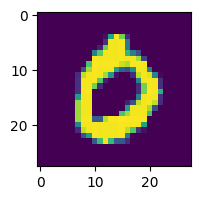

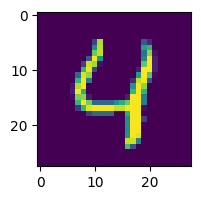

In [ ]:
# Set default figure size to 6 inches (width) by 4 inches (height)
plt.rcParams["figure.figsize"] = (4, 2)

for i in range(5):
    plt.imshow(test_X_Or[i])
    plt.show()
## Answer: 9 2 1 0 9

# 3. KNN Model


In [ ]:
classifier = KNeighborsClassifier(n_neighbors= 5)
classifier.fit(train_X, train_y)


KNeighborsClassifier()

In [ ]:
train_preds_KNN = classifier.predict(train_X)
test_preds_KNN = classifier.predict(test_X)

In [ ]:
# Compute accuracy on training set
train_acc_KNN = accuracy_score(train_y, train_preds_KNN)
print("Training accuracy:", train_acc_KNN)

# Compute accuracy on test set

test_acc_KNN = accuracy_score(test_y, test_preds_KNN)
print("Test accuracy:", test_acc_KNN)

Training accuracy: 0.9819166666666667
Test accuracy: 0.9688


In [ ]:
with open("knn_model.pkl", "wb") as f:
    pickle.dump(classifier, f)

In [ ]:
with open("knn_model.pkl", "rb") as f:
    knn_loaded = pickle.load(f)

In [ ]:
samples = test_X[5:10]
predictions = knn_loaded.predict(samples)
print("Predictions:", predictions)

Predictions: [1 4 9 5 9]


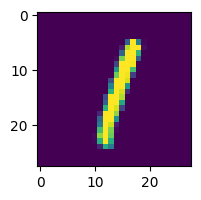

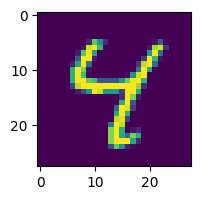

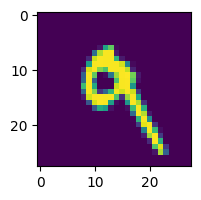

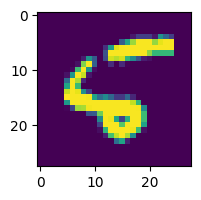

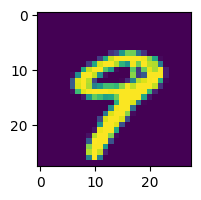

In [ ]:
# Set default figure size to 6 inches (width) by 4 inches (height)
plt.rcParams["figure.figsize"] = (4, 2)

for i in range(5, 10):
    plt.imshow(test_X_Or[i])
    plt.show()
## Answer: 1 4 9 5 9

## Visualization accuracies in the training and test of 3 models

<ipython-input-34-7a09d6b24e5f>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_train.set_xticklabels(models, rotation=45)


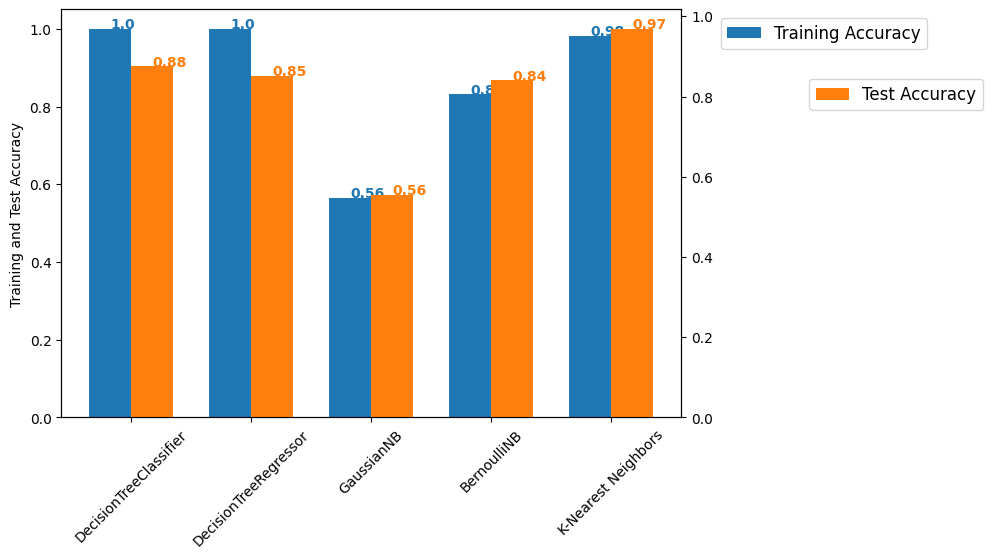

In [ ]:
# Set the data for the three models
train_accs = [train_acc_treeCLass, train_acc_treeReg, train_acc_Gau, train_acc_Ber, train_acc_KNN]
test_accs = [test_acc_treeCLass, test_acc_treeReg, test_acc_Gau, test_acc_Ber, test_acc_KNN]
models = ['DecisionTreeClassifier', 'DecisionTreeRegressor', 'GaussianNB', 'BernoulliNB','K-Nearest Neighbors']

# Set the width of each bar
width = 0.35

# Set the position of each bar on the x-axis
x_train = [0, 1, 2, 3, 4]
x_test = [i + width for i in x_train]

# Set the figure size
fig = plt.figure(figsize=(8, 6))

# Create the two axes
ax_train = fig.add_subplot(111)
ax_test = ax_train.twinx()

# Create the bars for the training accuracies
ax_train.bar(x_train, train_accs, width, label='Training Accuracy', color='tab:blue')

# Create the bars for the test accuracies
ax_test.bar(x_test, test_accs, width, label='Test Accuracy', color='tab:orange')

# Set the labels for the x-axis and the y-axis
# ax_train.set_xlabel('Model', fontsize= 'large')
ax_train.set_ylabel('Training and Test Accuracy')
ax_train.set_xticklabels(models, rotation=45)
# Set the position of the x-ticks and set the labels for the x-ticks
plt.xticks([i + width/2 for i in x_train], models, rotation=45)

# Set the spacing between the bars
plt.subplots_adjust(bottom=0.2)

# Loop through the training accuracies and add the values as text on the bars
for i, v in enumerate(train_accs):
    ax_train.text(i, v, str(round(v, 2)), color='tab:blue', fontweight='bold')

# Loop through the test accuracies and add the values as text on the bars
for i, v in enumerate(test_accs):
    ax_test.text(i+width, v, str(round(v, 2)), color='tab:orange', fontweight='bold')

# Add a legend
ax_train.legend(loc='upper left', fontsize='large', bbox_to_anchor=(1.05, 1))
ax_test.legend(loc='upper right', fontsize='large', bbox_to_anchor=(1.5, 0.85))

# Show the plot
plt.show()
